<a href="https://colab.research.google.com/github/yusra-sohail/machine_learning_projects/blob/main/classification_proj_1_catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset = https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [40]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [41]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
#code to unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators help divide the data into batches for loadbalancing eg 2500 pictures so at a time only some part of 2.5k will be processed

In [44]:
  train_ds = keras.utils.image_dataset_from_directory(

    directory = '/content/train',
    labels='inferred' ,
    label_mode='int',
    #model expect karega saari images ka size same ho isliye:
    image_size=(256,256),
    batch_size=32

  )

Found 20000 files belonging to 2 classes.


In [45]:
  validation_ds = keras.utils.image_dataset_from_directory(

    directory = '/content/test',
    labels='inferred' ,
    label_mode='int',
    #model expect karega saari images ka size same ho isliye:
    image_size=(256,256),
    batch_size=32
#abhi pixel values are stored in the form of numpy array jiski range hai 0-255
    #therefore in the next step we will normalise it
  )

Found 5000 files belonging to 2 classes.


In [46]:
#normalizingg
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [47]:
#creating a cnn model 3 layers first layer 32 filters then 64 then 128
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 127, 127, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 58s 93ms/step - loss: 0.0642 - accuracy: 0.9763 - val_loss: 0.6980 - val_accuracy: 0.8162
Epoch 2/5
625/625 [==============================] - 56s 88ms/step - loss: 0.0493 - accuracy: 0.9829 - val_loss: 0.8608 - val_accuracy: 0.8094
Epoch 3/5
625/625 [==============================] - 58s 92ms/step - loss: 0.0451 - accuracy: 0.9837 - val_loss: 0.9393 - val_accuracy: 0.8186
Epoch 4/5
625/625 [==============================] - 56s 89ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 1.2612 - val_accuracy: 0.7974
Epoch 5/5
625/625 [==============================] - 55s 87ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.7958 - val_accuracy: 0.8098


<function matplotlib.pyplot.show(close=None, block=None)>

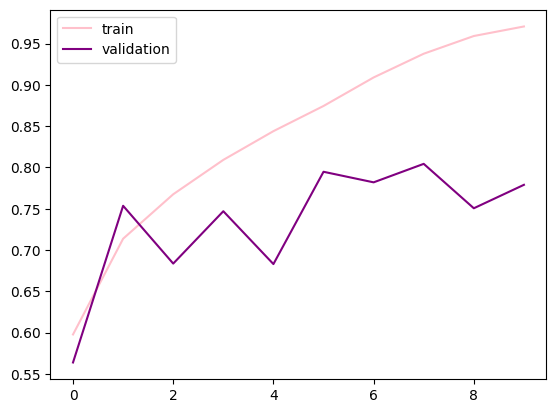

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='pink',label='train')
plt.plot(history.history['val_accuracy'],color='purple',label='validation')
plt.legend()
plt.show


In [ ]:
#since the model is overfitting we will use
#batch normalization and dropout to reduce it .

<function matplotlib.pyplot.show(close=None, block=None)>

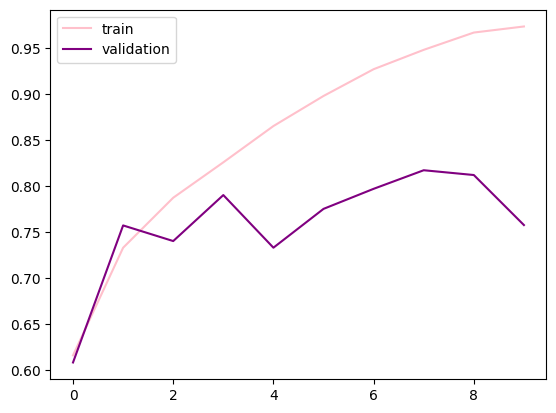

In [32]:
# model after overfitting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='pink',label='train')
plt.plot(history.history['val_accuracy'],color='purple',label='validation')
plt.legend()
plt.show



1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

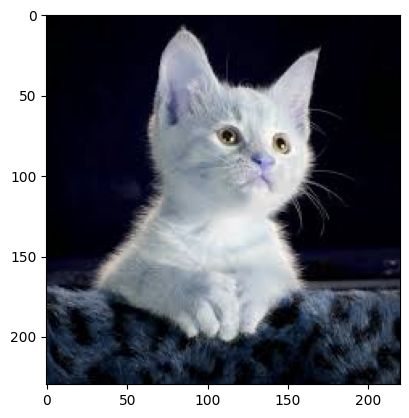

In [64]:
  #testing on unseen data
  #SHOWS O IF ITS A CAT AND 1 IF ITS A DOG
  import cv2
  test2=cv2.imread('/content/cat1.jpg')
  plt.imshow(test2)
  test2.shape
  test2=cv2.resize(test2,(256,256))
  input2 = test2.reshape((1,256,256,3))
  model.predict(input2)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

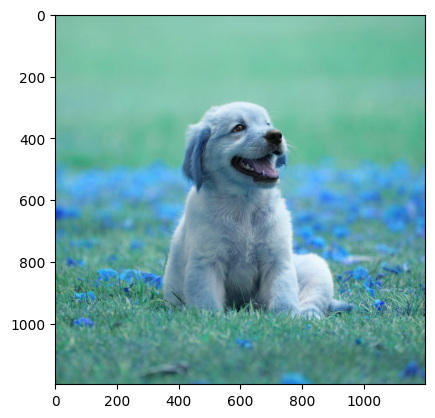

In [65]:
  #testing on unseen data

  import cv2
  test1=cv2.imread('/content/dog.jpg')
  plt.imshow(test1)
  test1.shape
  test1=cv2.resize(test1,(256,256))
  input1 = test1.reshape((1,256,256,3))
  model.predict(input1)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

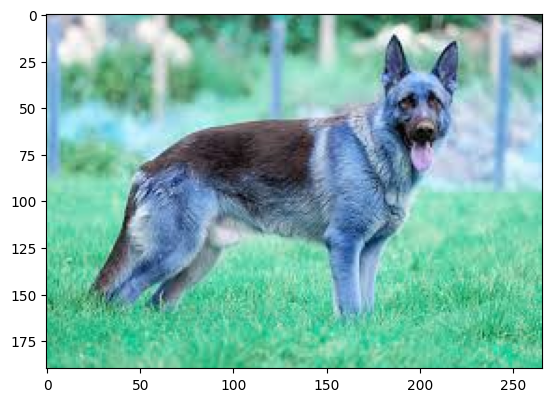

In [66]:
  #testing on unseen data

  import cv2
  test2=cv2.imread('/content/dog2.jpg')
  plt.imshow(test2)
  test2.shape
  test2=cv2.resize(test2,(256,256))
  input2 = test2.reshape((1,256,256,3))
  model.predict(input2)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

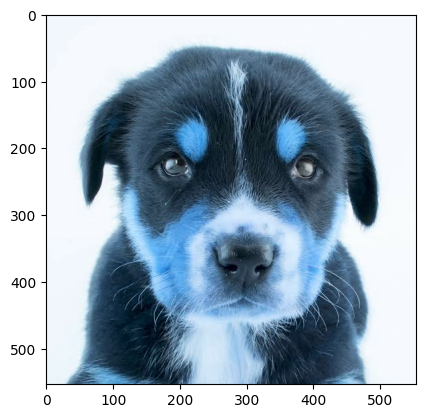

In [69]:
  #testing on unseen data

  import cv2
  test2=cv2.imread('/content/dawg.jpg')
  plt.imshow(test2)
  test2.shape
  test2=cv2.resize(test2,(256,256))
  input2 = test2.reshape((1,256,256,3))
  model.predict(input2)